# Import required packages

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns

### Read the file

In [ ]:
vento_tormo_data = sc.read_h5ad(file_path,'/vento-tormo.h5ad')
vento_tormo_data.var_names_make_unique()

In [5]:
vento_tormo_data.obs

,Author,Comment[BioSD_SAMPLE],Factor Value[organism part],Source Name,SourceName
CellID,,,,,
FCA7511885:AACGTTGTCATGTCCCx,Vento-Tormo_2018,SAMEA4837774,placenta,FCA7511885,FCA7511885
FCA7511885:AAAGTAGTCAAGAAGTx,Vento-Tormo_2018,SAMEA4837774,placenta,FCA7511885,FCA7511885
FCA7511885:AAAGCAATCATCGGATx,Vento-Tormo_2018,SAMEA4837774,placenta,FCA7511885,FCA7511885
FCA7511885:AACTCAGCAGGTGCCTx,Vento-Tormo_2018,SAMEA4837774,placenta,FCA7511885,FCA7511885
FCA7511885:AACGTTGGTCAGAATAx,Vento-Tormo_2018,SAMEA4837774,placenta,FCA7511885,FCA7511885
...,...,...,...,...,...
FCA7474068:TTGGAACTCAAGAAGTx,Vento-Tormo_2018,SAMEA4837768,placenta,FCA7474068,FCA7474068
FCA7474068:TTGGCAAGTCTGGTCGx,Vento-Tormo_2018,SAMEA4837768,placenta,FCA7474068,FCA7474068
FCA7474068:TTTGCGCAGCACACAGx,Vento-Tormo_2018,SAMEA4837768,placenta,FCA7474068,FCA7474068


In [6]:
num_unique_samples = vento_tormo_data.obs['Comment[BioSD_SAMPLE]'].nunique()

print("Number of different samples:", num_unique_samples)

Number of different samples: 9


### Preprocessing
The first step is to identify the genes that have been labelled mitochondrial genes. These genes are typically annotated like "MT-, Mt- or mt-". Human is almost always "MT-". Firstly find all the genes that start with MT-:

In [7]:
sc.pp.filter_cells(vento_tormo_data, min_genes=200)
sc.pp.filter_genes(vento_tormo_data, min_counts = 10)
sc.pp.filter_genes(vento_tormo_data, min_cells = 3)

In [8]:
vento_tormo_data.var['mt'] = vento_tormo_data.var_names.str.startswith('MT-')

In [9]:
vento_tormo_data.var

,Accession,Chromosome,End,Start,Strand,n_counts,n_cells,mt
Gene,,,,,,,,
AC145212.1,ENSG00000277400,GL000194.1,115018,53590,-,501.0,491,False
MAFIP,ENSG00000274847,GL000194.1,115055,53594,-,32.0,32,False
AC011043.1,ENSG00000276256,GL000195.1,49164,42939,-,1148.0,1060,False
AL592183.1,ENSG00000273748,GL000219.1,83311,54224,-,623.0,609,False
AC240274.1,ENSG00000271254,KI270711.1,29626,4612,-,3041.0,2536,False
...,...,...,...,...,...,...,...,...
TMSB4Y,ENSG00000154620,Y,13706024,13703899,+,1087.0,893,False
NLGN4Y,ENSG00000165246,Y,14845650,14522573,+,199.0,187,False
AC010889.2,ENSG00000288049,Y,19759978,19744756,+,36.0,36,False


The next line of code is to order the genes based on the value in the 'mt' column - this verifies that the MT genes have been labelled correctly.

In [10]:
print(vento_tormo_data.var.sort_values(by='mt'))

                  Accession  Chromosome        End      Start Strand  \
Gene                                                                   
AC145212.1  ENSG00000277400  GL000194.1     115018      53590      -   
GPR156      ENSG00000175697           3  120285094  120164645      -   
GSK3B       ENSG00000082701           3  120094417  119821323      -   
COX17       ENSG00000138495           3  119677454  119654513      -   
AC073352.2  ENSG00000272967           3  119579650  119579212      -   
...                     ...         ...        ...        ...    ...   
NME3        ENSG00000103024          16    1771730    1770286      -   
AL031710.1  ENSG00000261399          16    1714208    1713527      -   
IFT140      ENSG00000187535          16    1612072    1510427      -   
MSRB1       ENSG00000198736          16    1943326    1938210      -   
RPS4Y2      ENSG00000280969           Y   20781032   20756108      +   

            n_counts  n_cells     mt  
Gene                    

# Run QC metrics

In [11]:
sc.pp.calculate_qc_metrics(vento_tormo_data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [12]:
vento_tormo_data.var

,Accession,Chromosome,End,Start,Strand,n_counts,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Gene,,,,,,,,,,,,
AC145212.1,ENSG00000277400,GL000194.1,115018,53590,-,501.0,491,False,491,0.014270,98.601458,501.0
MAFIP,ENSG00000274847,GL000194.1,115055,53594,-,32.0,32,False,32,0.000911,99.908853,32.0
AC011043.1,ENSG00000276256,GL000195.1,49164,42939,-,1148.0,1060,False,1060,0.032699,96.980745,1148.0
AL592183.1,ENSG00000273748,GL000219.1,83311,54224,-,623.0,609,False,609,0.017745,98.265353,623.0
AC240274.1,ENSG00000271254,KI270711.1,29626,4612,-,3041.0,2536,False,2536,0.086618,92.776575,3041.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TMSB4Y,ENSG00000154620,Y,13706024,13703899,+,1087.0,893,False,893,0.030962,97.456420,1087.0
NLGN4Y,ENSG00000165246,Y,14845650,14522573,+,199.0,187,False,187,0.005668,99.467358,199.0
AC010889.2,ENSG00000288049,Y,19759978,19744756,+,36.0,36,False,36,0.001025,99.897459,36.0


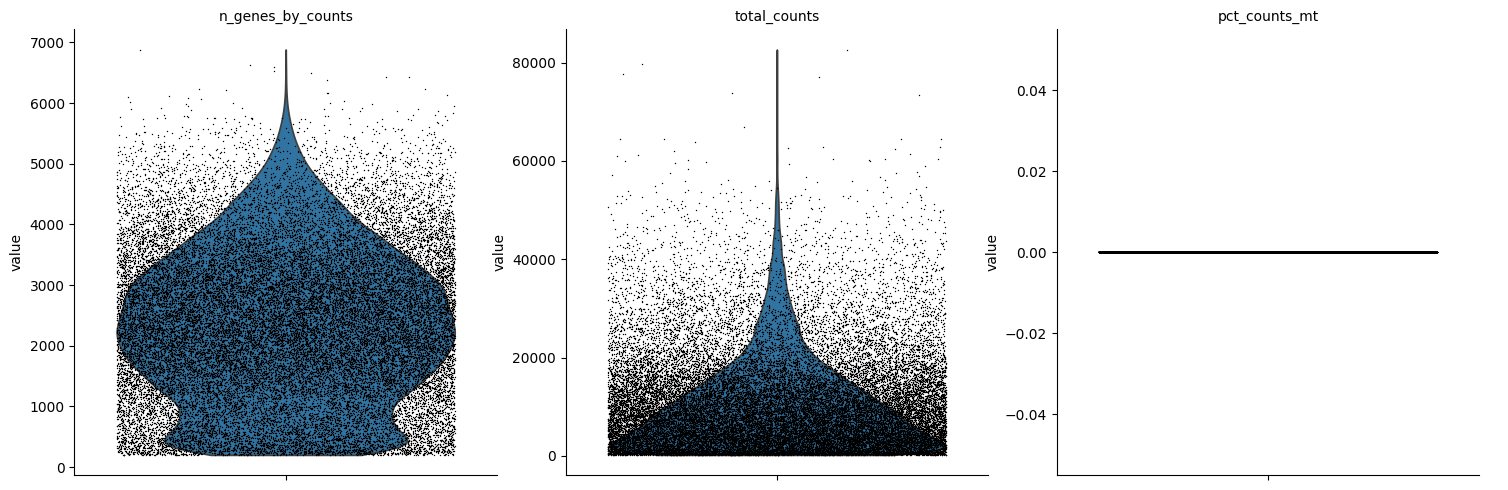

In [13]:
sc.pl.violin(vento_tormo_data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

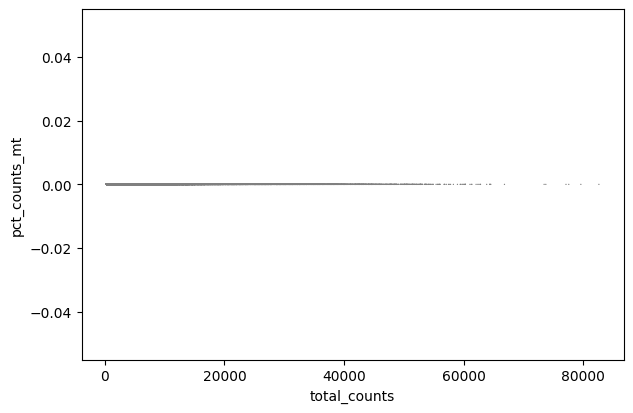

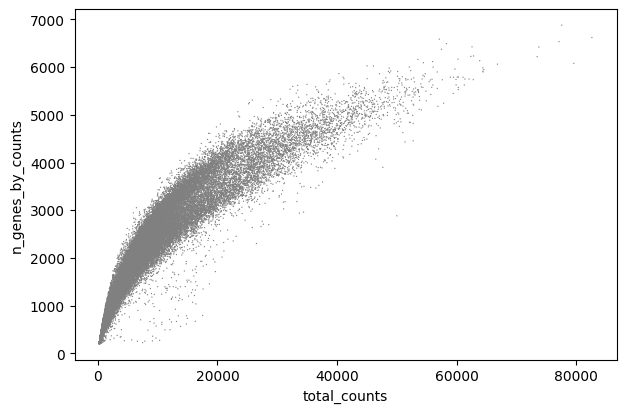

In [14]:
sc.pl.scatter(vento_tormo_data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(vento_tormo_data, x='total_counts', y='n_genes_by_counts')

Remove cells that are in the 98th centile and above for gene counts:

In [15]:
upper_lim=np.quantile(vento_tormo_data.obs.n_genes_by_counts.values, .98)
upper_lim

4872.860000000001

Now you know the upper limit, you can filter out all the cells that were above that limit:

In [16]:
vento_tormo_data = vento_tormo_data[vento_tormo_data.obs.pct_counts_mt < 20, :]
vento_tormo_data = vento_tormo_data[vento_tormo_data.obs.n_genes_by_counts < upper_lim]

Check that this has removed cells from the data set:

In [17]:
vento_tormo_data.X

<34405x22115 sparse matrix of type '<class 'numpy.float32'>'
	with 78064317 stored elements in Compressed Sparse Row format>

# Normalise
Normalise to 10,000 (1e4) reads per cell.

In [18]:
sc.pp.normalize_total(vento_tormo_data, exclude_highly_expressed = True, target_sum=1e4)

/home/anna/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


# Logarithmise

In [19]:
sc.pp.log1p(vento_tormo_data)

# Identify highly-variable genes

In [20]:
sc.pp.highly_variable_genes(vento_tormo_data, min_mean=0.0125, max_mean=3, min_disp=0.5)

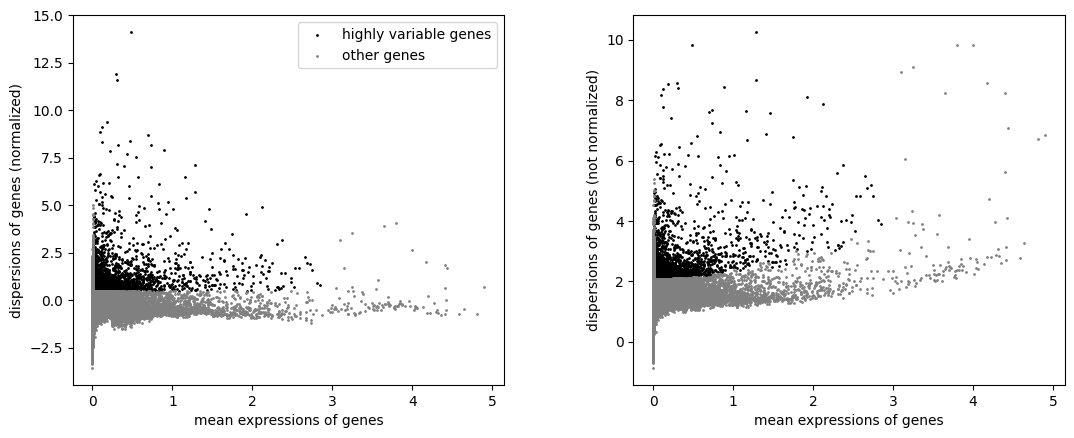

In [21]:
sc.pl.highly_variable_genes(vento_tormo_data)

In [22]:
vento_tormo_data.raw = vento_tormo_data

## Do the filtering to only include the highly variable genes

In [23]:
vento_tormo_data = vento_tormo_data[:, vento_tormo_data.var.highly_variable]

In [24]:
sc.pp.scale(vento_tormo_data, max_value=10)

/home/anna/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


# PCA analysis

In [25]:
sc.tl.pca(vento_tormo_data, svd_solver='arpack')

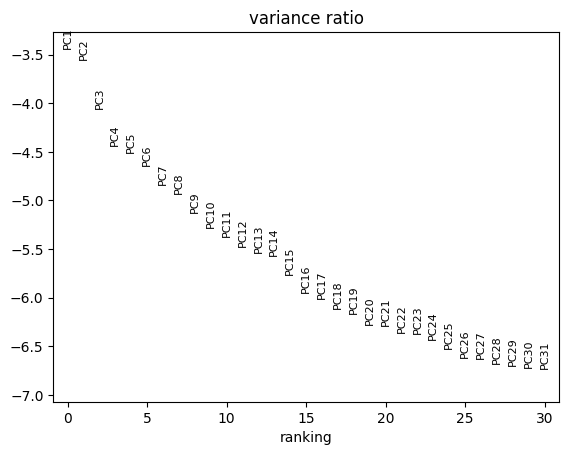

In [26]:
sc.pl.pca_variance_ratio(vento_tormo_data, log=True)

### Save the result:

In [27]:
vento_tormo_results = 'results/vento_tormo_results.h5ad'

# The neighbourhood graph
This calculates the pairwise similarities/distances between cells based on gene expression profiles. Cells that are neighbours (k nearest neighbours) have similar expression to each other and are connected by edges.

May need to edit the number of PCs used based on previous plot. No. of nearest neighbours is set to 100. Previously used 10 which had more heterogenous clusters.


In [29]:
sc.pp.neighbors(vento_tormo_data, n_neighbors=100, n_pcs=30)

Now to embed the graph in 2D using UMAP:

In [30]:
sc.tl.umap(vento_tormo_data)

In [31]:
sc.tl.leiden(vento_tormo_data, resolution = 0.5, key_added='clusters')

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


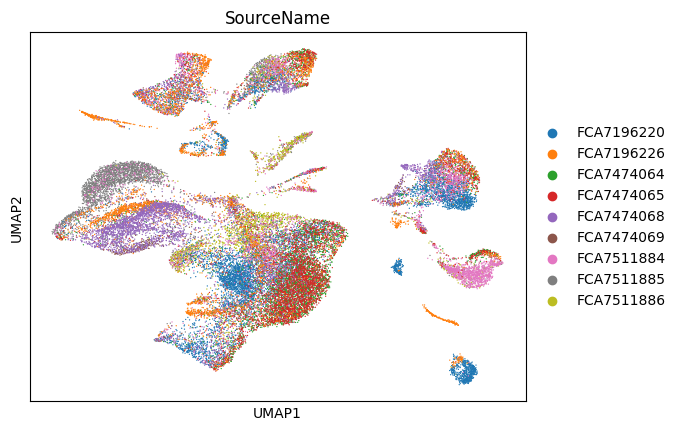

In [32]:
sc.pl.umap(vento_tormo_data, color='SourceName')

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


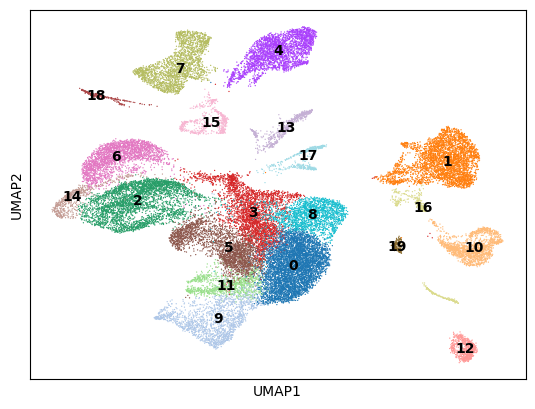

In [33]:
sc.pl.umap(vento_tormo_data, color='clusters', legend_loc='on data', title='') #additional to add names

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


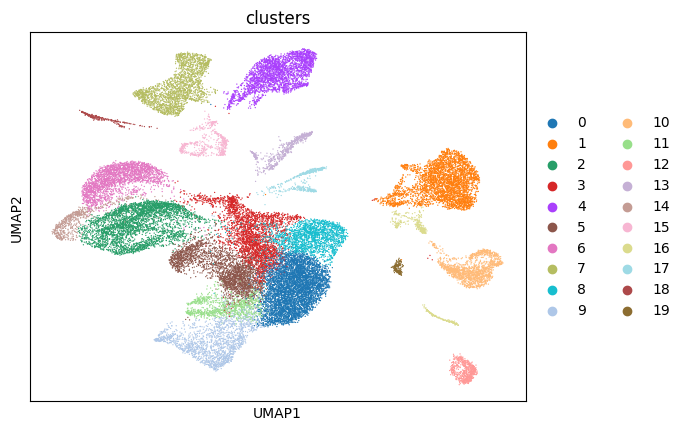

In [34]:
sc.pl.umap(vento_tormo_data, color=['clusters'])

# Identifying Marker Genes
This is commonly done using the Wilcoxon rank-sum test or Fisher's exact test. This computes the differential expression analysis between clusters.

In [35]:
sc.tl.rank_genes_groups(vento_tormo_data, 'clusters', method='wilcoxon', key_added="wilcoxon")

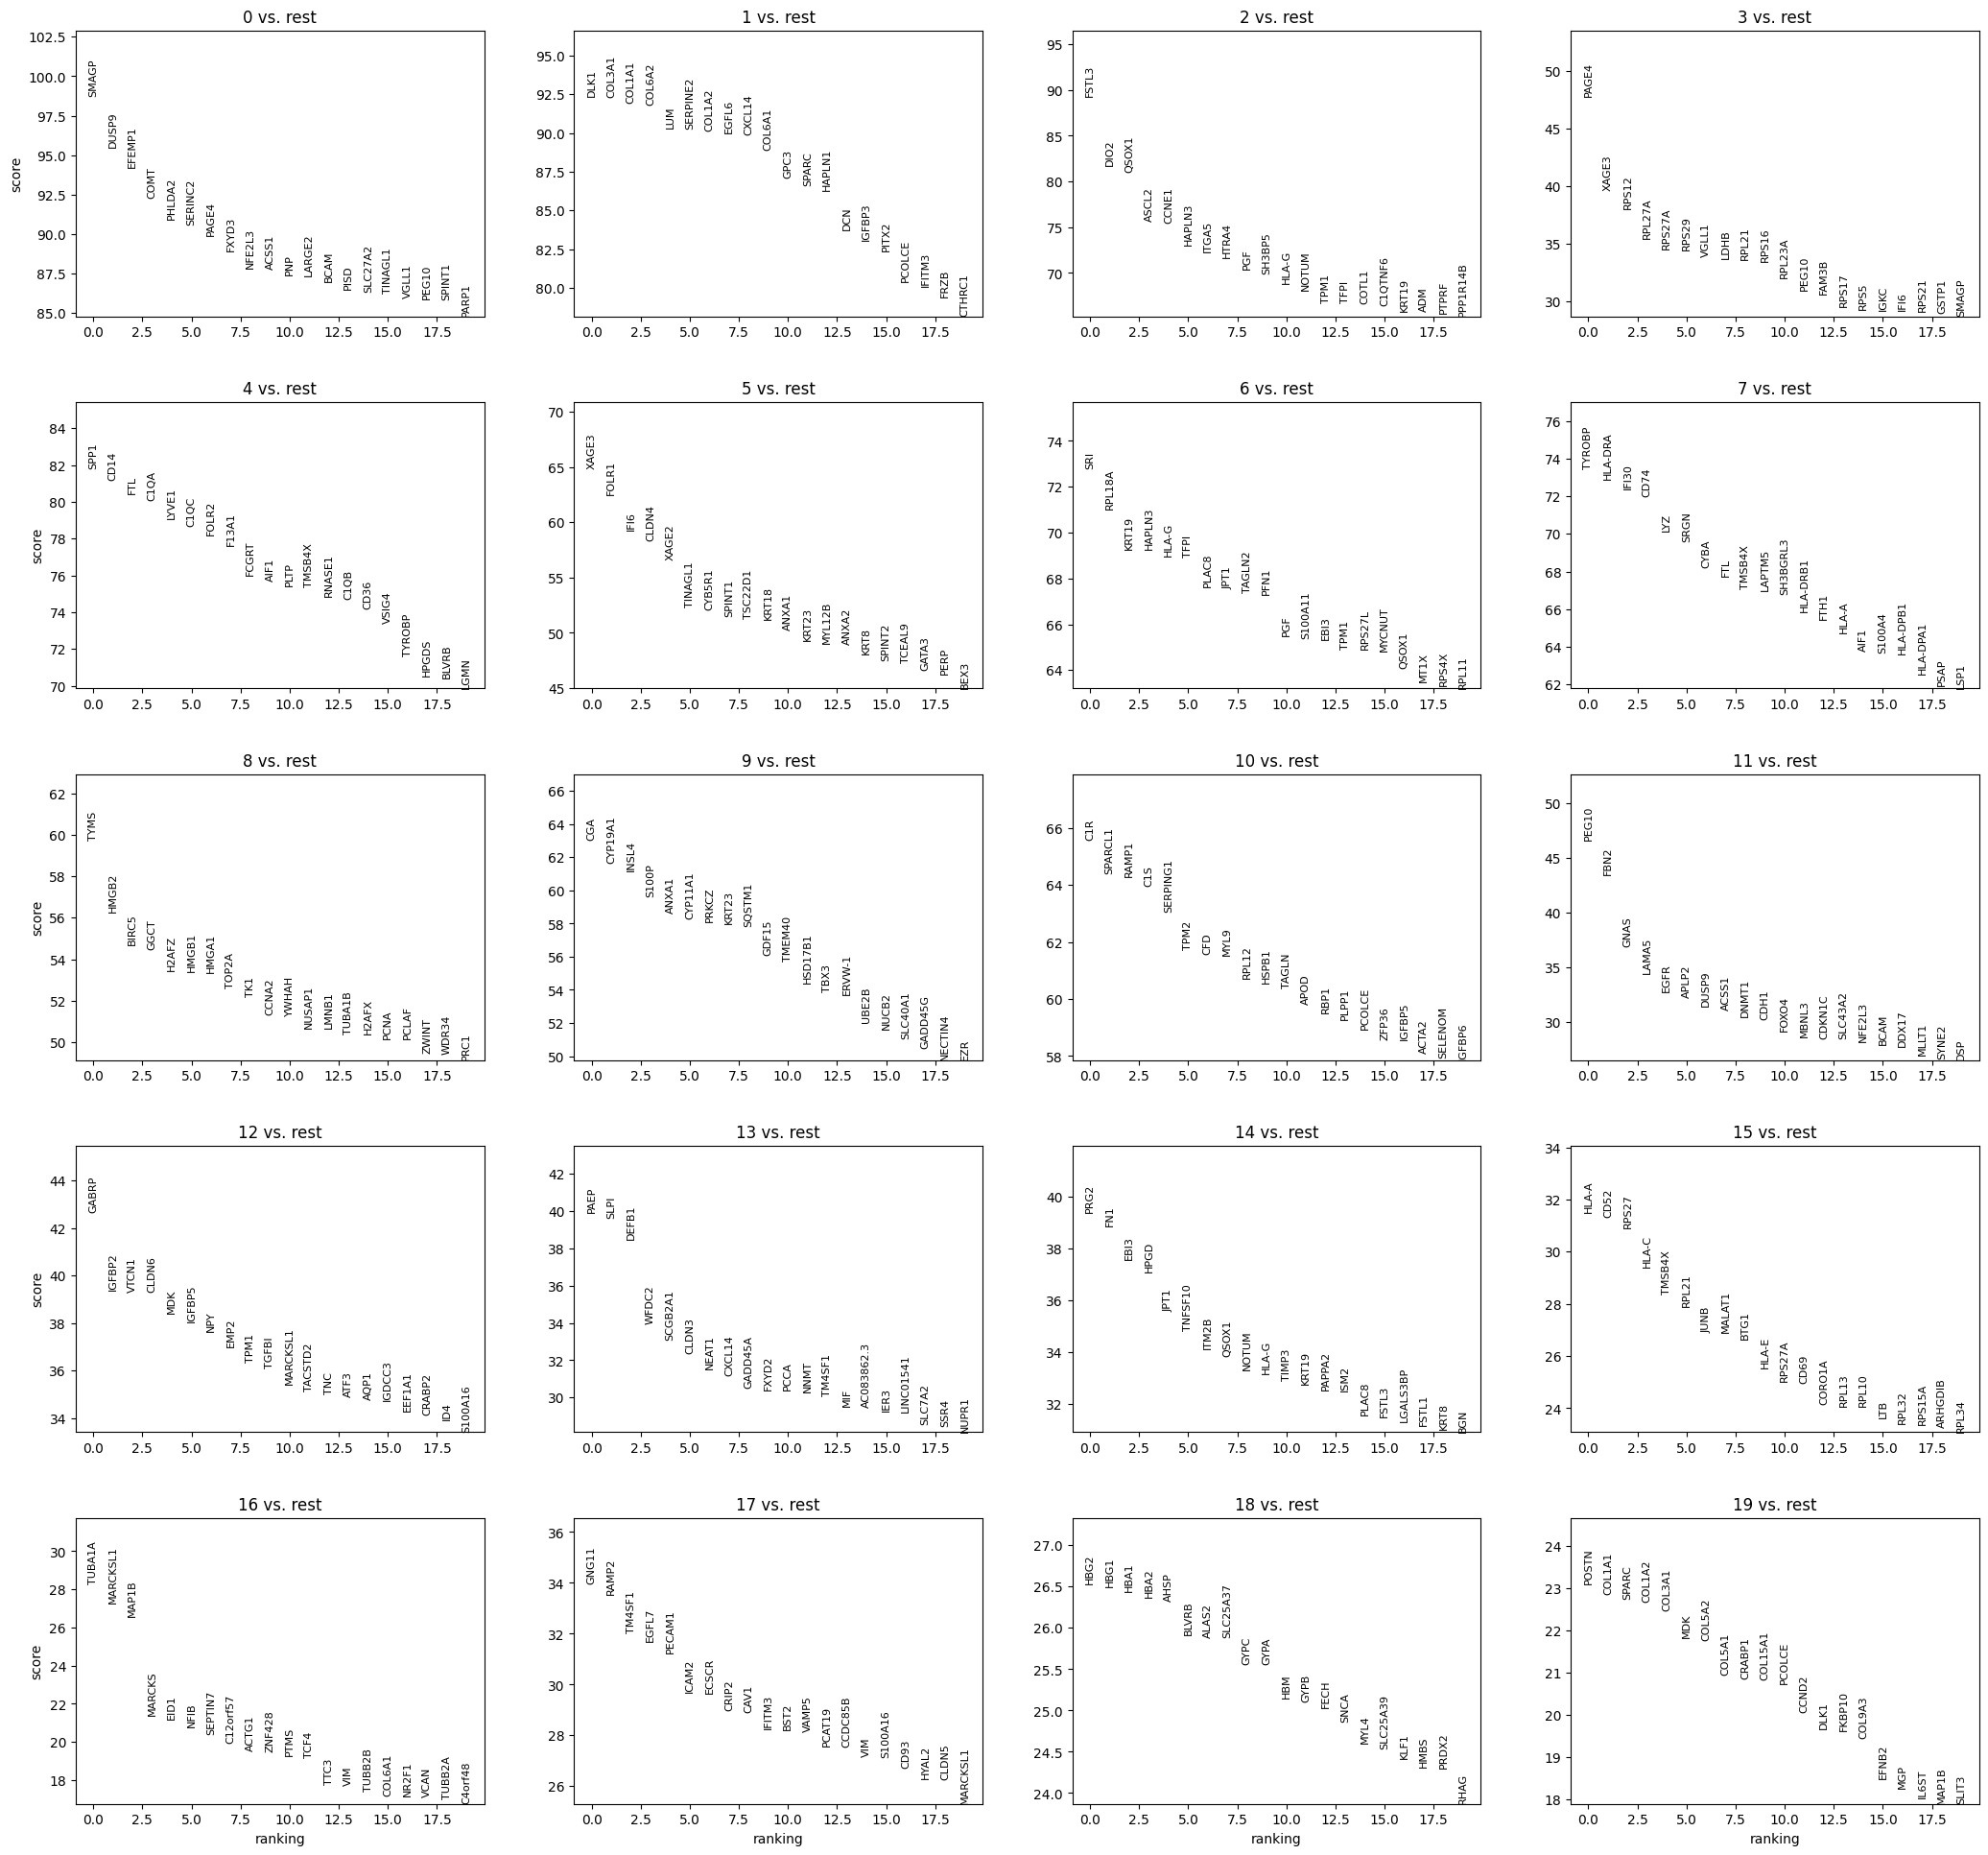

In [36]:
sc.pl.rank_genes_groups(vento_tormo_data, n_genes=20, sharey=False, key="wilcoxon")

### Generated CSV that lists the genes in each cluster with their corresponding log fold change and their p-values

In [37]:
result = vento_tormo_data.uns['wilcoxon']
groups = result['names'].dtype.names
vento_tormo_data_genes= pd.DataFrame(
    {group +'_' +key[:1]:result[key][group]
     for group in groups for key in ['names', 'pvals', 'logfoldchanges']})

In [38]:
vento_tormo_data_genes.head()

,0_n,0_p,0_l,1_n,1_p,1_l,2_n,2_p,2_l,3_n,...,16_l,17_n,17_p,17_l,18_n,18_p,18_l,19_n,19_p,19_l
0,SMAGP,0.0,3.839244,DLK1,0.0,7.969940,FSTL3,0.0,5.831110,PAGE4,...,4.956161,GNG11,7.934184e-253,7.503386,HBG2,3.927691e-155,13.721886,POSTN,4.170822e-118,11.788100
1,DUSP9,0.0,4.049146,COL3A1,0.0,7.350650,DIO2,0.0,5.090255,XAGE3,...,4.771247,RAMP2,1.615599e-246,7.961226,HBG1,9.343984e-155,12.327987,COL1A1,1.553653e-115,8.141113
2,EFEMP1,0.0,3.413570,COL1A1,0.0,7.402997,QSOX1,0.0,4.732313,RPS12,...,5.023115,TM4SF1,2.528469e-225,7.870464,HBA1,4.223546e-154,12.511494,SPARC,1.663962e-114,5.819638
3,COMT,0.0,2.635402,COL6A2,0.0,6.957177,ASCL2,0.0,5.596507,RPL27A,...,2.958376,EGFL7,1.303005e-220,5.788075,HBA2,3.292994e-153,12.588535,COL1A2,6.801978e-114,7.150256
4,PHLDA2,0.0,3.342411,LUM,0.0,7.209630,CCNE1,0.0,4.389318,RPS27A,...,1.615699,PECAM1,3.175484e-214,7.460458,AHSP,1.029909e-152,12.319218,COL3A1,6.958599e-112,7.539722


In [ ]:
#Save the above table:
vento_tormo_data_genes.to_csv('vento_tormo_clusters_final.csv')

# Using protein atlas:

In [39]:
def gene_lookup(input_df, search_df):
    '''
    input_df: pandas dataframe with columns of different clusters, and rows containing gene names
    search_df: pandas dataframe containing the 'rna_single_cell_type_tissue.tsv' from human protein atlas (create a subset by tissue type)
    '''
    
    input_clusters = input_df.columns.tolist()
    output = []
    for cluster in input_clusters:  
        for gene in input_df[cluster].tolist():
            try:
                search = search_df[search_df['Gene name'] == gene].nlargest(3,'nTPM')
                output.append([cluster, gene, search['Cell type'].iloc[0],search['nTPM'].iloc[0],search['Cell type'].iloc[1],search['nTPM'].iloc[1],search['Cell type'].iloc[2],search['nTPM'].iloc[2]])
            except IndexError:
                output.append([cluster, gene, 'error', 'error', 'error', 'error', 'error', 'error'])
    return pd.DataFrame(output, columns = ['Cluster_Name', 'Gene_Name', 'Cell_Type_1', 'nTPM_1', 'Cell_Type_2', 'nTPM_2', 'Cell_Type_3', 'nTPM_3'])

In [41]:
df = pd.read_csv('protein_atlas_rna_single_cell_type_tissue.tsv', sep='\t')
placenta_df = df[df['Tissue'] == 'placenta'].copy() # create a dataframe of genes where the Tissue type is 'placenta'
df = None
placenta_df.head()

,Gene,Gene name,Tissue,Cluster,Cell type,Read count,nTPM
86,ENSG00000000003,TSPAN6,placenta,c-0,cytotrophoblasts,1254,25.7
87,ENSG00000000003,TSPAN6,placenta,c-1,smooth muscle cells,857,54.3
88,ENSG00000000003,TSPAN6,placenta,c-2,extravillous trophoblasts,1624,48.7
89,ENSG00000000003,TSPAN6,placenta,c-3,cytotrophoblasts,882,33.3
90,ENSG00000000003,TSPAN6,placenta,c-4,hofbauer cells,33,2.7


In [ ]:
cluster_genes = pd.read_csv('vento_tormo_clusters_final.csv',index_col=0)#, skiprows=1)
cluster_genes.head()

,0_n,0_p,0_l,1_n,1_p,1_l,2_n,2_p,2_l,3_n,...,16_l,17_n,17_p,17_l,18_n,18_p,18_l,19_n,19_p,19_l
0,SMAGP,0.0,3.839244,DLK1,0.0,7.969940,FSTL3,0.0,5.831110,PAGE4,...,4.956162,GNG11,7.934184e-253,7.503386,HBG2,3.927691e-155,13.721886,POSTN,4.170822e-118,11.788100
1,DUSP9,0.0,4.049146,COL3A1,0.0,7.350650,DIO2,0.0,5.090255,XAGE3,...,4.771247,RAMP2,1.615599e-246,7.961226,HBG1,9.343984e-155,12.327987,COL1A1,1.553653e-115,8.141113
2,EFEMP1,0.0,3.413570,COL1A1,0.0,7.402997,QSOX1,0.0,4.732313,RPS12,...,5.023115,TM4SF1,2.528469e-225,7.870464,HBA1,4.223546e-154,12.511494,SPARC,1.663962e-114,5.819638
3,COMT,0.0,2.635402,COL6A2,0.0,6.957177,ASCL2,0.0,5.596507,RPL27A,...,2.958376,EGFL7,1.303005e-220,5.788075,HBA2,3.292994e-153,12.588535,COL1A2,6.801978e-114,7.150256
4,PHLDA2,0.0,3.342411,LUM,0.0,7.209630,CCNE1,0.0,4.389317,RPS27A,...,1.615699,PECAM1,3.175484e-214,7.460458,AHSP,1.029909e-152,12.319218,COL3A1,6.958599e-112,7.539722


In [49]:
cluster_genes = cluster_genes.loc[:,cluster_genes.columns].head(20).copy() # keeps columns and first 20 genes
cluster_genes

,0_n,0_p,0_l,1_n,1_p,1_l,2_n,2_p,2_l,3_n,...,16_l,17_n,17_p,17_l,18_n,18_p,18_l,19_n,19_p,19_l
0,SMAGP,0.0,3.839244,DLK1,0.0,7.969940,FSTL3,0.0,5.831110,PAGE4,...,4.956162,GNG11,7.934184e-253,7.503386,HBG2,3.927691e-155,13.721886,POSTN,4.170822e-118,11.788100
1,DUSP9,0.0,4.049146,COL3A1,0.0,7.350650,DIO2,0.0,5.090255,XAGE3,...,4.771247,RAMP2,1.615599e-246,7.961226,HBG1,9.343984e-155,12.327987,COL1A1,1.553653e-115,8.141113
2,EFEMP1,0.0,3.413570,COL1A1,0.0,7.402997,QSOX1,0.0,4.732313,RPS12,...,5.023115,TM4SF1,2.528469e-225,7.870464,HBA1,4.223546e-154,12.511494,SPARC,1.663962e-114,5.819638
3,COMT,0.0,2.635402,COL6A2,0.0,6.957177,ASCL2,0.0,5.596507,RPL27A,...,2.958376,EGFL7,1.303005e-220,5.788075,HBA2,3.292994e-153,12.588535,COL1A2,6.801978e-114,7.150256
4,PHLDA2,0.0,3.342411,LUM,0.0,7.209630,CCNE1,0.0,4.389317,RPS27A,...,1.615699,PECAM1,3.175484e-214,7.460458,AHSP,1.029909e-152,12.319218,COL3A1,6.958599e-112,7.539722
5,SERINC2,0.0,3.086931,SERPINE2,0.0,5.745997,HAPLN3,0.0,4.658367,RPS29,...,5.361243,ICAM2,1.034115e-193,7.343272,BLVRB,4.687464e-148,5.869340,MDK,1.150284e-105,5.371492
6,PAGE4,0.0,4.547975,COL1A2,0.0,6.534981,ITGA5,0.0,3.939129,VGLL1,...,1.744325,ECSCR,2.434673e-193,11.892406,ALAS2,1.060592e-147,12.510102,COL5A2,5.572394e-105,6.094150
7,FXYD3,0.0,3.007671,EGFL6,0.0,8.274610,HTRA4,0.0,5.377042,LDHB,...,1.975496,CRIP2,1.647125e-184,5.995799,SLC25A37,1.102816e-147,6.465641,COL5A1,1.935260e-97,5.540463
8,NFE2L3,0.0,3.132183,CXCL14,0.0,8.115138,PGF,0.0,3.623143,RPL21,...,1.097224,CAV1,1.372103e-183,4.338953,GYPC,3.914500e-144,5.819707,CRABP1,1.182262e-96,9.291899
9,ACSS1,0.0,3.071003,COL6A1,0.0,6.384611,SH3BP5,0.0,3.422840,RPS16,...,2.163966,IFITM3,1.014859e-175,3.494980,GYPA,5.029543e-144,13.027589,COL15A1,2.486542e-96,5.576678


In [50]:
results = gene_lookup(cluster_genes, placenta_df) # second variable is the dataframe created from a subset of the human protein atlas
results

,Cluster_Name,Gene_Name,Cell_Type_1,nTPM_1,Cell_Type_2,nTPM_2,Cell_Type_3,nTPM_3
0,0_n,SMAGP,cytotrophoblasts,1701.0,cytotrophoblasts,1672.9,cytotrophoblasts,1621.8
1,0_n,DUSP9,cytotrophoblasts,1589.0,syncytiotrophoblasts,1547.0,cytotrophoblasts,1395.4
2,0_n,EFEMP1,cytotrophoblasts,1848.1,cytotrophoblasts,1750.6,cytotrophoblasts,1656.2
3,0_n,COMT,cytotrophoblasts,1161.5,cytotrophoblasts,1116.5,cytotrophoblasts,1026.0
4,0_n,PHLDA2,syncytiotrophoblasts,10186.8,cytotrophoblasts,5938.1,cytotrophoblasts,5104.7
...,...,...,...,...,...,...,...,...
1195,19_l,6.646105,error,error,error,error,error,error
1196,19_l,5.033033,error,error,error,error,error,error
1197,19_l,3.400033,error,error,error,error,error,error
1198,19_l,4.630516,error,error,error,error,error,error


In [ ]:
results.to_csv('vento_tormo_filtered_placenta_protein_atlas_results.csv')

Now use this csv to identify which cell type each cluster is likely to be. It is helpful to use conditional formatting in excel to identify similarities.

# Labelling cell types:

In [51]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'CTB',
     '1': 'SM',
     '2': 'EVT',
     '3': 'CTB',
     '4': 'HB',
     '5': 'CTB',
     '6': 'EVT',
     '7': 'HB',
     '8': 'CTB',
     '9': 'STB',
    '10': 'SM',
    '11': 'CTB', 
    '12': 'FB',
    '13': 'MIC',
    '14': 'EVT',
    '15': 'HB',
    '16': 'FB',
    '17': 'END',
    '18': 'MIC',
    '19': 'FB', 
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
vento_tormo_data.obs['cell type'] = vento_tormo_data.obs['clusters'].map(cluster2annotation).astype('category')


In [52]:
# create a dictionary to map cluster to annotation label
uniquecelltype = {
     '0': 'CTB_1',
     '1': 'SM_1',
     '2': 'EVT_1',
     '3': 'CTB_2',
     '4': 'HB_1',
     '5': 'CTB_3',
     '6': 'EVT_2',
     '7': 'HB_2',
     '8': 'CTB_5',
     '9': 'STB_1',
    '10': 'SM_2',
    '11': 'CTB_4', 
    '12': 'FB_1',
    '13': 'MIC_2',
    '14': 'EVT_3',
    '15': 'HB_3',
    '16': 'FB_2',
    '17': 'END_1',
    '18': 'MIC_3',
    '19': 'FB_3', 
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
vento_tormo_data.obs['unique cell type'] = vento_tormo_data.obs['clusters'].map(uniquecelltype).astype('category')

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


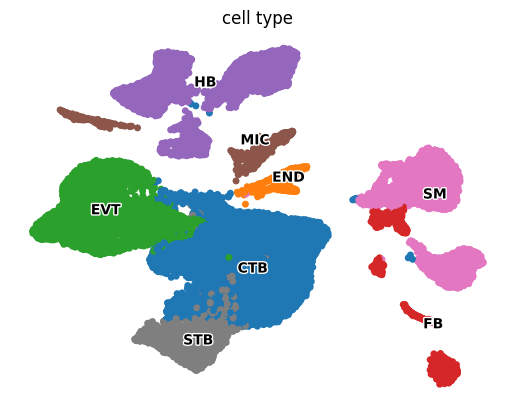

In [54]:
sc.pl.umap(vento_tormo_data, color='cell type', legend_loc='on data', size=100,
           frameon=False, legend_fontsize=10, legend_fontoutline=2, save='labelled.pdf')

In [ ]:
#vento_tormo_data = sc.read_h5ad('processed_vento_tormo_data.h5ad')

In [57]:
custom_palette = {
    'CTB': 'dodgerblue',
    'END': 'sienna',
    'EVT':'green',
    'FB': 'orange',
    'HB': 'mediumpurple',
    'MIC': 'red',
    'SM': 'hotpink',
    'STB': 'gray',
}

In [58]:
import matplotlib.pyplot as plt

/home/anna/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


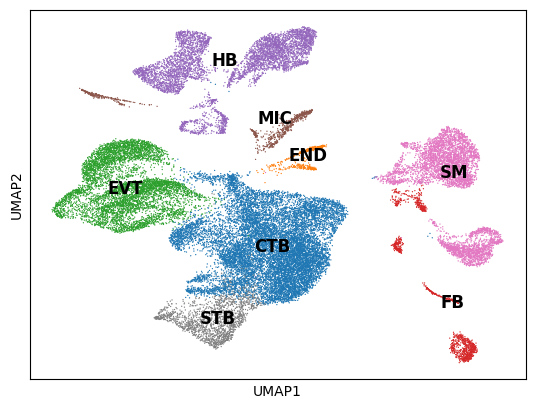

In [59]:
sc.pl.umap(vento_tormo_data, color='cell type', title='', legend_loc='on data', legend_fontsize=12)

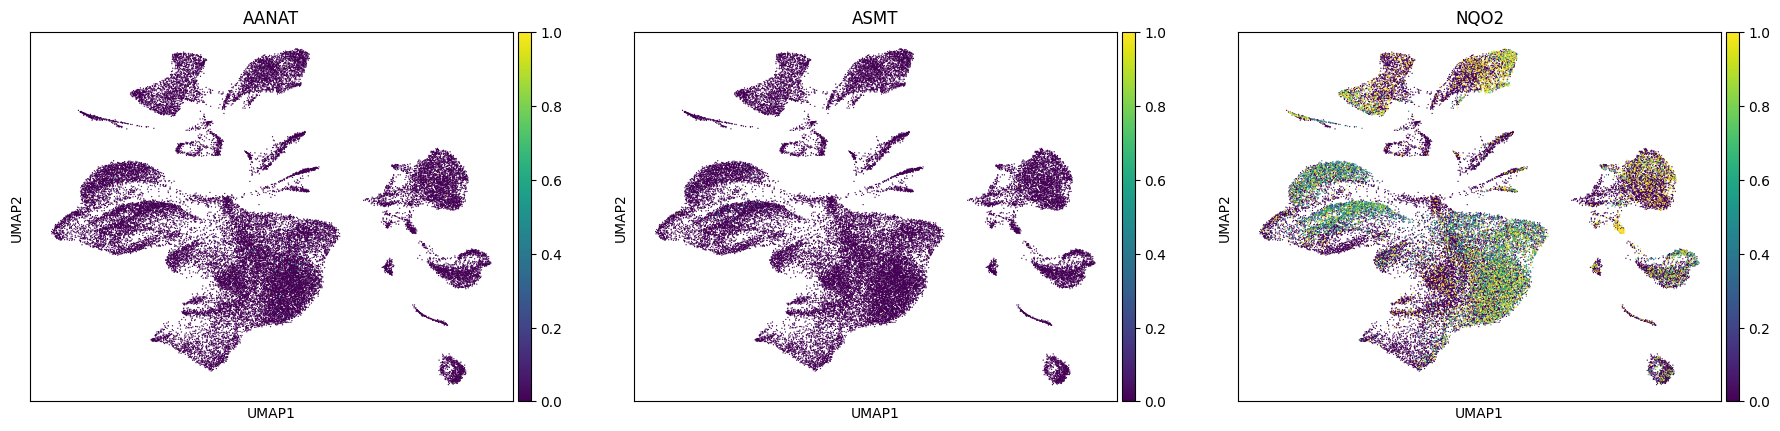

In [61]:
sc.pl.umap(vento_tormo_data, color = ['AANAT', 'ASMT', 'NQO2'], frameon = True, vmax=1) #Change gene names to view expression of others for cell type verification

In [65]:
gene_of_interest = "MTNR1B"

# Check if the gene is present in the var_names (gene names)
if gene_of_interest in vento_tormo_data.var_names:
    # Get the index of the gene in the var_names
    gene_index = list(vento_tormo_data.var_names).index(gene_of_interest)
    
    # Extract expression values for the gene across all cells
    expression_values = vento_tormo_data[:, gene_index].X
    
    # Calculate total counts and number of cells expressing the gene
    total_counts = expression_values.sum()
    num_expressing_cells = (expression_values > 0).sum()
    
    print(f"The gene {gene_of_interest} has a total count of {total_counts} and is expressed in {num_expressing_cells} cells.")
else:
    print(f"The gene {gene_of_interest} is not present in the dataset.")

The gene MTNR1B is not present in the dataset.
